In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import dateutil.parser

#create a dictionary with key = (C/A,Unit,SCP,Station)
#and the value = [date, count]
with open("turnstile_150404.txt", "r") as MTA_new:
    reader = csv.reader(MTA_new)
    # Skip header line
    reader.next()
    
    MTA_key1 = open("MTA_key1.txt","w")
    writer = csv.writer(MTA_key1)
    mta_list={}

    

    for index, row in enumerate(reader):
        key = tuple(row[0:4])
        value = [row[6],int(float(row[-2]))]
            
            
        if key in mta_list:
            mta_list[key].append(value)
        else:
            mta_list[key] = [value] 

#create a new dictionary with key = (C/A,Unit,SCP,Station)
#and the value = [date,count] 
#where all same date are group together
#(where count = last count of the day - first count of the day)

new_list = {}
for k, v in mta_list.iteritems():
    i = 0
    while i < (len(v) - 1):
        date = v[i][0]
        ini_count = v[i][1] 
        next_count = v[i][1]
        while date == v[i][0] and i< (len(v)-1):
            i += 1
            next_count = v[i][1]
        
        new_value = [date, next_count - ini_count]
        if k in new_list:
            new_list[k].append(new_value)
        else:
            new_list[k]=[new_value]
            
            
#Creat a new dictionary where key = (C/A,Unit,Station)
#value is (date,count)

Turnstile_list = new_list.keys()
CUS_turnstiles = {}


while len(Turnstile_list) != 0 :
    current_CUS = Turnstile_list[0] 
    TT_CUS      = list(current_CUS) 
    TT_CUS.remove(TT_CUS[2])
    CUS_turnstiles[tuple(TT_CUS)] = new_list[current_CUS]

    Turnstile_list.remove(current_CUS)
    for TT_key in Turnstile_list:
        TT_keyl = list(TT_key)
        TT_keyl.remove(TT_keyl[2])
        if TT_CUS == TT_keyl:
            CUS_turnstiles[tuple(TT_CUS)].extend(new_list[TT_key])
            Turnstile_list.remove(TT_key)
            
#k, v = CUS_turnstiles.items()[0]
#tempdict = {k: v}
#print tempdict

p=CUS_turnstiles.keys()
#print p
#print CUS_turnstiles[p[1]]
print CUS_turnstiles.items()[1]

# print ""
# print ""

# #Creat a new dictionary where key = (C/A,Unit,Station)
# #but group all same day count for each key together

# Updated_CUS = {}

# for CUS_k, CUS_v in tempdict.items():
#     Updated_CUS[CUS_k]=[]
   
#     for l in CUS_v:
#         print 'l is', l
#         CUS_date = l[0]
#         CUS_counts = l[1]
#         CUS_v.remove(l)
#         print 'CUS_v is', CUS_v
        
#         for h in CUS_v:
#             print 'h is', h
#             if h[0] == CUS_date:
#                 CUS_counts += h[1]
#                 CUS_v.remove(h)
#                 print 'CUS_v in inner loop is', CUS_v
        
#         Updated_CUS[CUS_k].append([CUS_date,CUS_counts])

            
# print Updated_CUS.values()
            
            
         
    


# # Second way of solving above problem:
CUS_hash = {}
Sorted_CUS = {}


for hash_k, hash_v in CUS_turnstiles.iteritems():
    my_hash={}
    
    
    for date_hash in hash_v:
        
        if date_hash[0] in my_hash:
            my_hash[date_hash[0]] += date_hash[1]
        else:
            my_hash[date_hash[0]]  = date_hash[1]
    
    CUS_counts_list = []
    for my_hash_k, my_hash_v in my_hash.iteritems():
        temp = [my_hash_k,my_hash_v]
        CUS_counts_list.append(temp)
#    print 'This is CUS_counts_list', CUS_counts_list   
    CUS_hash[hash_k] = CUS_counts_list
    
print CUS_hash.items()[1]


    

(('R137', 'R031', '34 ST-PENN STA'), [['03/28/2015', 0], ['03/29/2015', 0], ['03/30/2015', 1604], ['03/31/2015', 1699], ['04/01/2015', 1707], ['04/02/2015', 1697], ['04/03/2015', 1149], ['03/28/2015', 0], ['03/29/2015', 0], ['03/30/2015', 1341], ['03/31/2015', 1445], ['04/01/2015', 1396], ['04/02/2015', 1406], ['04/03/2015', 1060], ['03/28/2015', 0], ['03/29/2015', 0], ['03/30/2015', 886], ['03/31/2015', 961], ['04/01/2015', 917], ['04/02/2015', 967], ['04/03/2015', 667]])
(('R137', 'R031', '34 ST-PENN STA'), [['03/28/2015', 0], ['03/30/2015', 3831], ['03/29/2015', 0], ['04/02/2015', 4070], ['04/01/2015', 4020], ['04/03/2015', 2876], ['03/31/2015', 4105]])


In [23]:
#Need to sort dictionary before hand so that graph
#is in order according to dates
Sorted_list = {}
for Sort_k in CUS_hash.keys():
    Sorted_list[Sort_k] = sorted(CUS_hash[Sort_k]) 

#print Sorted_list.values()[1]

Station_data={}
for station_k, station_v in Sorted_list.iteritems():
    station_dates = []
    station_counts = []
    for i in xrange(0,len(station_v)-1):
        station_dates.append(dateutil.parser.parse(station_v[i][0]))
        station_counts.append(station_v[i][1])
    Station_data[station_k] = [station_dates,station_counts]

print Station_data.items()[1]    

[['03/28/2015', 0], ['03/29/2015', 0], ['03/30/2015', 3831], ['03/31/2015', 4105], ['04/01/2015', 4020], ['04/02/2015', 4070], ['04/03/2015', 2876]]
(('R137', 'R031', '34 ST-PENN STA'), [[datetime.datetime(2015, 3, 28, 0, 0), datetime.datetime(2015, 3, 29, 0, 0), datetime.datetime(2015, 3, 30, 0, 0), datetime.datetime(2015, 3, 31, 0, 0), datetime.datetime(2015, 4, 1, 0, 0), datetime.datetime(2015, 4, 2, 0, 0)], [0, 0, 3831, 4105, 4020, 4070]])


[datetime.datetime(2015, 3, 28, 0, 0), datetime.datetime(2015, 3, 29, 0, 0), datetime.datetime(2015, 3, 30, 0, 0), datetime.datetime(2015, 3, 31, 0, 0), datetime.datetime(2015, 4, 1, 0, 0), datetime.datetime(2015, 4, 2, 0, 0)]


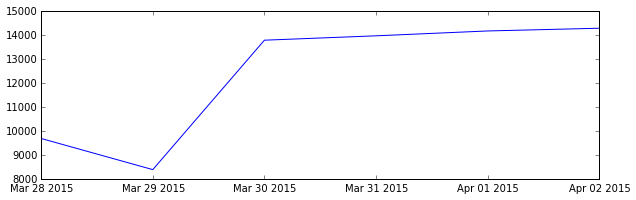

In [24]:
print Station_data.values()[0][0]
plt.figure(figsize=(10,3))
plt.plot(Station_data.values()[0][0],Station_data.values()[0][1])

In [3]:
print CUS_hash.items()[1]

NameError: name 'CUS_hash' is not defined

In [2]:
CUS_hash.values()[1]

NameError: name 'CUS_hash' is not defined

In [1]:
len(CUS_hash.keys())

NameError: name 'CUS_hash' is not defined